<a href="https://colab.research.google.com/github/Leorasaharia/hospital-schema/blob/main/database_schema_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# =====================================
# 1. INSTALL & START MYSQL
# =====================================

!apt-get update
!apt-get install -y mysql-server
!service mysql start

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cli.github.com/packages stable/main amd64 Packages [354 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,623 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [6,205 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,870 kB]
Get:14 http://ar

In [2]:
# =====================================
# 2. INSTALL MYSQL CONNECTOR
# =====================================

!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 57.4 MB/s eta 0:00:00


In [3]:
# =====================================
# 3. SET MYSQL ROOT PASSWORD
# =====================================

!sudo mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY 'root';"

In [4]:
# =====================================
# 4. CONNECT PYTHON TO MYSQL
# =====================================

import mysql.connector
import random
from datetime import date, timedelta

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root"
)

cur = db.cursor()

In [5]:
# =====================================
# 5. CREATE DATABASE
# =====================================

cur.execute("create database if not exists schema_demo")
cur.execute("use schema_demo")

In [6]:
# =====================================
# 6. CREATE TABLE (TABLES + FIELDS + CONSTRAINTS)
# =====================================

cur.execute("""
create table student (
    student_id int primary key,
    name varchar(100) not null,
    gender varchar(10),
    dob date,
    phone varchar(15) unique,
    city varchar(50)
)
""")

In [7]:
# =====================================
# 7. INDIAN NAME DATA
# =====================================

male_names = [
    "Amit","Rahul","Arjun","Rohit","Vikas","Suresh","Ankit","Kunal","Ravi","Aditya"
]

female_names = [
    "Neha","Pooja","Anjali","Kavya","Riya","Priya","Sneha","Aarti","Nisha","Isha"
]

surnames = [
    "Sharma","Verma","Gupta","Singh","Patel","Kumar","Mehta","Reddy","Iyer","Das"
]

cities = [
    "Delhi","Mumbai","Bengaluru","Chennai","Kolkata",
    "Hyderabad","Pune","Jaipur","Indore","Lucknow"
]


In [8]:
# =====================================
# 8. FUNCTION TO GENERATE RANDOM DOB
# =====================================

def random_dob():
    start = date(1990, 1, 1)
    end = date(2010, 12, 31)
    return start + timedelta(days=random.randint(0, (end - start).days))


In [9]:
# =====================================
# 9. INSERT 1000 INDIAN STUDENT RECORDS
# =====================================

students = []

for i in range(1, 1001):
    gender = random.choice(["Male", "Female"])

    if gender == "Male":
        fname = random.choice(male_names)
    else:
        fname = random.choice(female_names)

    full_name = fname + " " + random.choice(surnames)
    phone = "9" + str(random.randint(100000000, 999999999))
    city = random.choice(cities)
    dob = random_dob()

    students.append((i, full_name, gender, dob, phone, city))

cur.executemany(
    "insert into student values (%s,%s,%s,%s,%s,%s)",
    students
)

db.commit()


In [10]:
# =====================================
# 10. DISPLAY ALL TABLES
# =====================================

print("TABLES IN DATABASE:")
cur.execute("show tables")
for t in cur:
    print(t)


TABLES IN DATABASE:
('student',)


In [11]:
# =====================================
# 11. DISPLAY STRUCTURE (FIELDS)
# =====================================

print("\nSTUDENT TABLE STRUCTURE:")
cur.execute("desc student")
for r in cur:
    print(r)



STUDENT TABLE STRUCTURE:
('student_id', 'int', 'NO', 'PRI', None, '')
('name', 'varchar(100)', 'NO', '', None, '')
('gender', 'varchar(10)', 'YES', '', None, '')
('dob', 'date', 'YES', '', None, '')
('phone', 'varchar(15)', 'YES', 'UNI', None, '')
('city', 'varchar(50)', 'YES', '', None, '')


In [12]:
# =====================================
# 12. DISPLAY ALL 1000 RECORDS
# =====================================

print("\nDISPLAYING 1000 INDIAN STUDENT RECORDS:\n")
cur.execute("select * from student")

for row in cur:
    print(row)


print("\n✅ 1000 Indian records displayed successfully")


DISPLAYING 1000 INDIAN STUDENT RECORDS:

(1, 'Kavya Das', 'Female', datetime.date(2000, 2, 23), '9420343151', 'Indore')
(2, 'Kunal Verma', 'Male', datetime.date(2000, 5, 15), '9573426697', 'Bengaluru')
(3, 'Rahul Verma', 'Male', datetime.date(1996, 11, 2), '9319701580', 'Lucknow')
(4, 'Riya Iyer', 'Female', datetime.date(1994, 3, 6), '9867771274', 'Hyderabad')
(5, 'Nisha Singh', 'Female', datetime.date(1998, 1, 19), '9843899851', 'Chennai')
(6, 'Kunal Gupta', 'Male', datetime.date(2006, 1, 11), '9381394886', 'Chennai')
(7, 'Kunal Kumar', 'Male', datetime.date(2000, 2, 20), '9804539110', 'Lucknow')
(8, 'Amit Kumar', 'Male', datetime.date(2002, 2, 13), '9907798216', 'Pune')
(9, 'Neha Das', 'Female', datetime.date(1996, 8, 7), '9360810488', 'Lucknow')
(10, 'Neha Gupta', 'Female', datetime.date(2010, 7, 3), '9367123255', 'Chennai')
(11, 'Anjali Sharma', 'Female', datetime.date(1992, 4, 24), '9620894894', 'Jaipur')
(12, 'Ravi Singh', 'Male', datetime.date(2009, 9, 16), '9161278118', 'Kolka

In [13]:
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="schema_demo"
)

cur = db.cursor()

cur.execute("select * from student limit 1000")

for row in cur:
    print(row)


(1, 'Kavya Das', 'Female', datetime.date(2000, 2, 23), '9420343151', 'Indore')
(2, 'Kunal Verma', 'Male', datetime.date(2000, 5, 15), '9573426697', 'Bengaluru')
(3, 'Rahul Verma', 'Male', datetime.date(1996, 11, 2), '9319701580', 'Lucknow')
(4, 'Riya Iyer', 'Female', datetime.date(1994, 3, 6), '9867771274', 'Hyderabad')
(5, 'Nisha Singh', 'Female', datetime.date(1998, 1, 19), '9843899851', 'Chennai')
(6, 'Kunal Gupta', 'Male', datetime.date(2006, 1, 11), '9381394886', 'Chennai')
(7, 'Kunal Kumar', 'Male', datetime.date(2000, 2, 20), '9804539110', 'Lucknow')
(8, 'Amit Kumar', 'Male', datetime.date(2002, 2, 13), '9907798216', 'Pune')
(9, 'Neha Das', 'Female', datetime.date(1996, 8, 7), '9360810488', 'Lucknow')
(10, 'Neha Gupta', 'Female', datetime.date(2010, 7, 3), '9367123255', 'Chennai')
(11, 'Anjali Sharma', 'Female', datetime.date(1992, 4, 24), '9620894894', 'Jaipur')
(12, 'Ravi Singh', 'Male', datetime.date(2009, 9, 16), '9161278118', 'Kolkata')
(13, 'Rohit Singh', 'Male', datetime.

In [14]:
import mysql.connector
import pandas as pd

# connect to mysql
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="schema_demo"
)

# read 100 records into dataframe
df = pd.read_sql("select * from student limit 1000", db)

# save as csv
df.to_csv("student_1000_records.csv", index=False)

print("CSV file created: student_100_records.csv")


CSV file created: student_100_records.csv


/tmp/ipython-input-4114938564.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("select * from student limit 1000", db)


In [18]:
!apt-get install graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.


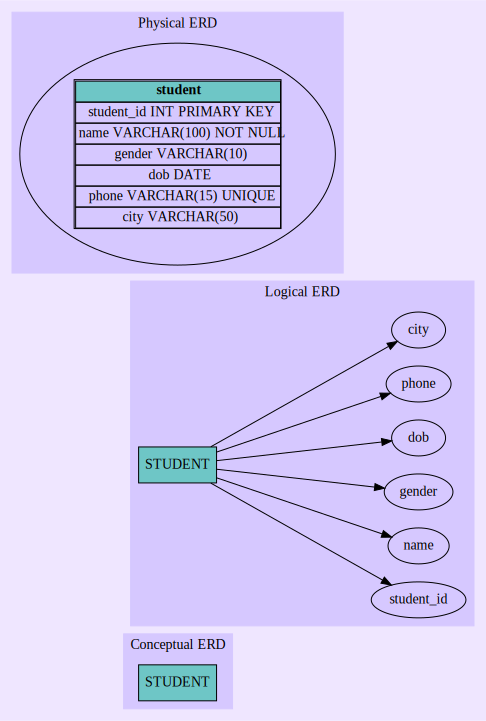

In [19]:
from graphviz import Digraph

erd = Digraph("ERD", format="png")
erd.attr(rankdir="LR", bgcolor="#EFE6FF")

# =======================
# CONCEPTUAL ERD
# =======================
with erd.subgraph(name="cluster_conceptual") as c:
    c.attr(label="Conceptual ERD", style="filled", color="#D6C8FF")
    c.node("Student_C", "STUDENT", shape="rectangle", style="filled", fillcolor="#6EC6C6")

# =======================
# LOGICAL ERD
# =======================
with erd.subgraph(name="cluster_logical") as l:
    l.attr(label="Logical ERD", style="filled", color="#D6C8FF")

    l.node(
        "Student_L",
        "STUDENT",
        shape="rectangle",
        style="filled",
        fillcolor="#6EC6C6"
    )

    # Attributes
    l.node("student_id", "student_id", shape="ellipse")
    l.node("name", "name", shape="ellipse")
    l.node("gender", "gender", shape="ellipse")
    l.node("dob", "dob", shape="ellipse")
    l.node("phone", "phone", shape="ellipse")
    l.node("city", "city", shape="ellipse")

    # Connections
    l.edge("Student_L", "student_id")
    l.edge("Student_L", "name")
    l.edge("Student_L", "gender")
    l.edge("Student_L", "dob")
    l.edge("Student_L", "phone")
    l.edge("Student_L", "city")

# =======================
# PHYSICAL ERD
# =======================
with erd.subgraph(name="cluster_physical") as p:
    p.attr(label="Physical ERD", style="filled", color="#D6C8FF")

    p.node(
        "Student_P",
        '''<
        <TABLE BORDER="1" CELLBORDER="1" CELLSPACING="0">
            <TR><TD BGCOLOR="#6EC6C6"><B>student</B></TD></TR>
            <TR><TD>student_id INT PRIMARY KEY</TD></TR>
            <TR><TD>name VARCHAR(100) NOT NULL</TD></TR>
            <TR><TD>gender VARCHAR(10)</TD></TR>
            <TR><TD>dob DATE</TD></TR>
            <TR><TD>phone VARCHAR(15) UNIQUE</TD></TR>
            <TR><TD>city VARCHAR(50)</TD></TR>
        </TABLE>
        >'''
    )

erd
